# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# 2.Import dataset

In [ ]:
titan_df=pd.read_csv('Titanic-Dataset.csv')
titan_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titan_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Dimension of the dataset

In [5]:
titan_df.shape

(891, 12)

In [6]:
titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. Data Cleaning

In [7]:
titan_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titan_df.drop(['Ticket','Cabin'], axis=1, inplace=True)
titan_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
titan_df['Age'].fillna(titan_df['Age'].median(), inplace=True)
titan_df['Embarked'].fillna(titan_df['Embarked'].mode()[0], inplace=True)

In [10]:
titan_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# 4. Exploratory Data Analysis

In [11]:
titan_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titan_df['Survived'] = titan_df['Survived'].map({0: 'no', 1: 'yes'})
titan_df['Survived'].value_counts()

Survived
no     549
yes    342
Name: count, dtype: int64

### Survival with respect to gender

In [13]:
dx = titan_df.groupby(['Survived','Sex'])['PassengerId'].count()
print(dx)

Survived  Sex   
no        female     81
          male      468
yes       female    233
          male      109
Name: PassengerId, dtype: int64


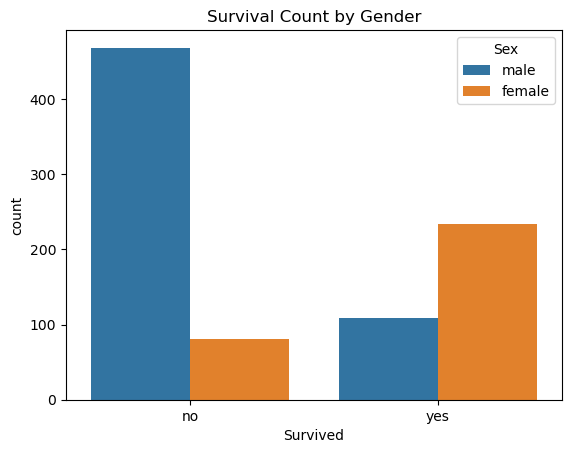

In [14]:
sns.countplot(data=titan_df, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.show()

### Survival with respect to Pclass

In [15]:
dp = titan_df.groupby(['Survived','Pclass'])['PassengerId'].count()
print(dp)

Survived  Pclass
no        1          80
          2          97
          3         372
yes       1         136
          2          87
          3         119
Name: PassengerId, dtype: int64


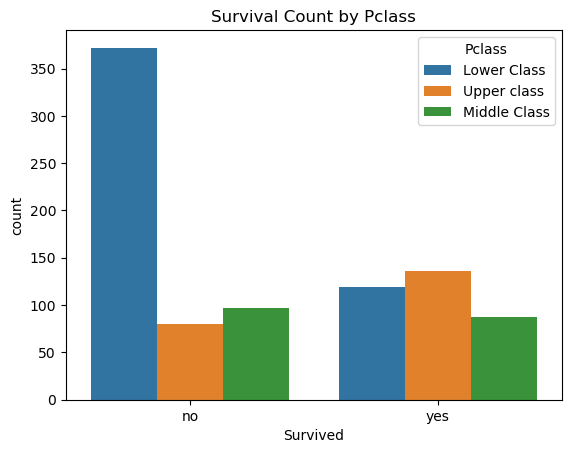

In [16]:
titan_df['Pclass']=titan_df['Pclass'].map({1:'Upper class',2:'Middle Class',3:'Lower Class'})
sns.countplot(data=titan_df, x='Survived', hue='Pclass')
plt.title("Survival Count by Pclass")
plt.show()

### Survival with respect to embarked
Port of embarkation
C=Cherbourg
Q=Queenstown
S=Southampton

In [17]:
ds = titan_df.groupby(['Survived','Embarked'])['PassengerId'].count()
print(ds)

Survived  Embarked
no        C            75
          Q            47
          S           427
yes       C            93
          Q            30
          S           219
Name: PassengerId, dtype: int64


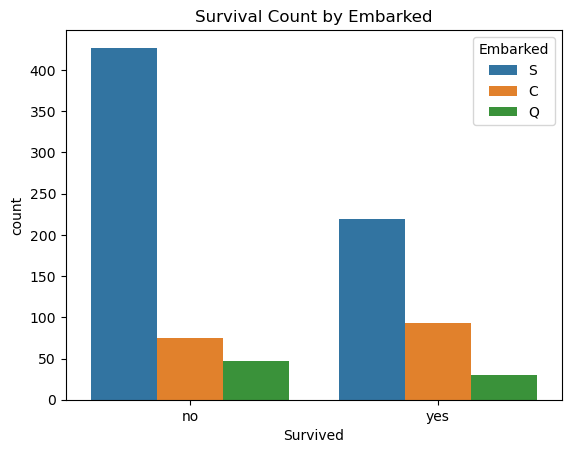

In [18]:
sns.countplot(data=titan_df, x='Survived', hue='Embarked')
plt.title("Survival Count by Embarked")
plt.show()

### Survival with respect to family size

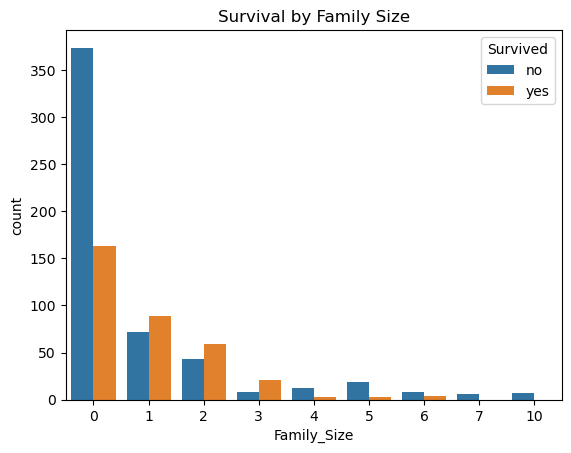

In [19]:
titan_df['Family_Size']=titan_df['SibSp']+titan_df['Parch']
sns.countplot(data=titan_df, x='Family_Size', hue='Survived')
plt.title("Survival by Family Size")
plt.show()

### Converting Categorical variable into numerical variable(Encoding)

In [20]:
le=LabelEncoder()
titan_df['Sex']=le.fit_transform(titan_df['Sex'])
titan_df['Embarked']=le.fit_transform(titan_df['Embarked'])
titan_df['Survived']=le.fit_transform(titan_df['Survived'])

In [21]:
titan_df['Pclass']=titan_df['Pclass'].map({'Upper class':1, 'Middle Class':2, 'Lower Class':3})

In [22]:
titan_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0,0


In [23]:
titan_df.drop(columns=['PassengerId','Name','Family_Size','Fare'], inplace=True)

In [24]:
titan_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,28.0,1,2,2
889,1,1,1,26.0,0,0,0


# 5.Model Training

In [25]:
# Define features and target variables
X = titan_df.drop(columns='Survived')
y=titan_df['Survived']

In [28]:
# Split the data into training and testing  sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [29]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# 6. Model Evaluation

In [30]:
X_train_predict=model.predict(X_train)

In [31]:
print(X_train_predict)

[0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 

In [32]:
train_accuracy=accuracy_score(y_train, X_train_predict)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.8061797752808989


In [33]:
X_test_predict=model.predict(X_test)

In [34]:
test_accuracy=accuracy_score(y_test, X_test_predict)
print("Testing accuracy:", test_accuracy)

Testing accuracy: 0.8156424581005587


In [35]:
print(classification_report(y_test, X_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       103
           1       0.79      0.78      0.78        76

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [36]:
cmatrix=confusion_matrix(y_test, X_test_predict)
print("Confusion matrix:",cmatrix)

Confusion matrix: [[87 16]
 [17 59]]


# 7. Conclusion

In [37]:
#Example input: Pclass=2, Sex=0, Age=38.0, SibSp=1, Parch=1, Embarked=2
case = np.array([[2, 0, 38.0, 1, 1, 2]])
res = model.predict(case)

if res==0:
    print("Not Survived")
else:
    print("Survived")

print("The logistic regression model achieves an accuracy of {:.2f}% on the test set.".format(test_accuracy * 100))

Survived
The logistic regression model achieves an accuracy of 81.56% on the test set.


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
